# Flight Data All EDA 

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
flight=pd.read_csv("flights.csv")
flight.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 5.00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 5.00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 5.00


In [8]:
flight.shape

(336776, 19)

# Data Cleaning

In [11]:
#To check Null value
flight.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [13]:
# Fill missing value Because We don't want to lose and we are applying fillna method with mean because Its all about the time 
Mean=flight["air_time"].mean()
Mean=flight["arr_delay"].mean()
Mean=flight["arr_time"].mean()
Mean=flight["dep_time"].mean()
Mean=flight["dep_delay"].mean()

In [15]:
flight['air_time']=flight['air_time'].fillna(Mean)
flight['arr_delay']=flight['arr_delay'].fillna(Mean)
flight['arr_time']=flight['arr_time'].fillna(Mean)
flight['dep_time']=flight['dep_time'].fillna(Mean)
flight['dep_delay']=flight['dep_delay'].fillna(Mean)

In [17]:
flight.isnull().sum()

year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time             0
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [19]:
flight["carrier"].unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [21]:
flight["carrier"].value_counts()

carrier
UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: count, dtype: int64

In [23]:
flight_encod=pd.DataFrame({"name":["OO","HA","YV","F9","AS","FL","VX","WN","9E","US","MQ","AA","DL","EV","B6","UA"]})

In [25]:
flight_encod

,name
0,OO
1,HA
2,YV
3,F9
4,AS
5,FL
6,VX
7,WN
8,9E
9,US


In [27]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()
flight["tailnum_encod"]=le.fit_transform(flight["tailnum"])

In [31]:
flight.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,tailnum_encod
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 5.00,179
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 5.00,523
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 5.00,2400


In [33]:
#If we want merge hour and minute column
flight_data= flight.loc[:,flight.columns !="tailnum"]
#directly drop the tailnum columns and save the data into new variable

In [35]:
flight_data.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,tailnum_encod
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,5,15,01-01-2013 5.00,179
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,5,29,01-01-2013 5.00,523
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,5,40,01-01-2013 5.00,2400


In [37]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        336776 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       336776 non-null  float64
 6   arr_time        336776 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       336776 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  origin          336776 non-null  object 
 12  dest            336776 non-null  object 
 13  air_time        336776 non-null  float64
 14  distance        336776 non-null  int64  
 15  hour            336776 non-null  int64  
 16  minute          336776 non-null  int64  
 17  time_hour 

In [39]:
#we are merge two columns hour and minutes
#flight_data['Hour'] = pd.to_datetime(flight_data[['hour','minute']]).dt.time
flight_data['Hour'] = flight_data.apply(lambda row: f"{row['hour']:02}:{row['minute']:02}", axis=1)

In [40]:
flight_data.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,tailnum_encod,Hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,5,15,01-01-2013 5.00,179,05:15
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,5,29,01-01-2013 5.00,523,05:29
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,5,40,01-01-2013 5.00,2400,05:40


In [43]:
#We are dropping the 2 column hour and minutes we found the new columns Hours
flight_data.drop(columns=["hour","minute"],inplace=True)

In [45]:
flight_data.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,time_hour,tailnum_encod,Hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,01-01-2013 5.00,179,05:15
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,01-01-2013 5.00,523,05:29
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,01-01-2013 5.00,2400,05:40


In [47]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        336776 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       336776 non-null  float64
 6   arr_time        336776 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       336776 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  origin          336776 non-null  object 
 12  dest            336776 non-null  object 
 13  air_time        336776 non-null  float64
 14  distance        336776 non-null  int64  
 15  time_hour       336776 non-null  object 
 16  tailnum_encod   336776 non-null  int64  
 17  Hour      

In [49]:
flight_data["time_hour"]

0          01-01-2013 5.00
1          01-01-2013 5.00
2          01-01-2013 5.00
3          01-01-2013 5.00
4          01-01-2013 6.00
                ...       
336771    30-09-2013 14.00
336772    30-09-2013 22.00
336773    30-09-2013 12.00
336774    30-09-2013 11.00
336775     30-09-2013 8.00
Name: time_hour, Length: 336776, dtype: object

In [51]:
#We want to convert time hour to numeric data
flight_datetime=flight_data["time_hour"]

In [53]:
flight_data['time_hour'] = pd.to_datetime(flight_datetime, format='%d-%m-%Y %H.%M')

In [55]:
flight_data['time_hour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 336776 entries, 0 to 336775
Series name: time_hour
Non-Null Count   Dtype         
--------------   -----         
336776 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.6 MB


In [57]:
#we are drop the hours from time hour column
flight_data['date_only'] = flight_data['time_hour'].dt.date

In [59]:
flight_data['date_only']

0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
336771    2013-09-30
336772    2013-09-30
336773    2013-09-30
336774    2013-09-30
336775    2013-09-30
Name: date_only, Length: 336776, dtype: object

In [61]:
flight_data.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,time_hour,tailnum_encod,Hour,date_only
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,2013-01-01 05:00:00,179,05:15,2013-01-01
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,2013-01-01 05:00:00,523,05:29,2013-01-01
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,2013-01-01 05:00:00,2400,05:40,2013-01-01


In [63]:
flight_data.drop(columns=["time_hour"],inplace=True)

In [65]:
flight_data.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,tailnum_encod,Hour,date_only
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,179,05:15,2013-01-01
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,523,05:29,2013-01-01
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,2400,05:40,2013-01-01


In [67]:
flight_data.copy()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,tailnum_encod,Hour,date_only
0,2013,1,1,517.00000,515,2.00000,830.00000,819,11.00000,UA,1545,EWR,IAH,227.00000,1400,179,05:15,2013-01-01
1,2013,1,1,533.00000,529,4.00000,850.00000,830,20.00000,UA,1714,LGA,IAH,227.00000,1416,523,05:29,2013-01-01
2,2013,1,1,542.00000,540,2.00000,923.00000,850,33.00000,AA,1141,JFK,MIA,160.00000,1089,2400,05:40,2013-01-01
3,2013,1,1,544.00000,545,-1.00000,1004.00000,1022,-18.00000,B6,725,JFK,BQN,183.00000,1576,3203,05:45,2013-01-01
4,2013,1,1,554.00000,600,-6.00000,812.00000,837,-25.00000,DL,461,LGA,ATL,116.00000,762,2660,06:00,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,12.63907,1455,12.63907,12.63907,1634,12.63907,9E,3393,JFK,DCA,12.63907,213,4043,14:55,2013-09-30
336772,2013,9,30,12.63907,2200,12.63907,12.63907,2312,12.63907,9E,3525,LGA,SYR,12.63907,198,4043,22:00,2013-09-30
336773,2013,9,30,12.63907,1210,12.63907,12.63907,1330,12.63907,MQ,3461,LGA,BNA,12.63907,764,1945,12:10,2013-09-30
336774,2013,9,30,12.63907,1159,12.63907,12.63907,1344,12.63907,MQ,3572,LGA,CLE,12.63907,419,1801,11:59,2013-09-30


In [69]:
flight_new=flight_data.copy()

In [71]:
flight_new.head(2)
# we have done all the possible EDA on this dataset
#this flight_new file is ready to training and testing Model 

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,tailnum_encod,Hour,date_only
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,179,05:15,2013-01-01
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,523,05:29,2013-01-01


In [73]:
flight_new.duplicated().sum()

np.int64(0)

In [75]:
flight_new['carrier'].value_counts()

carrier
UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: count, dtype: int64

In [77]:
flight_new.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'origin', 'dest', 'air_time', 'distance', 'tailnum_encod', 'Hour',
       'date_only'],
      dtype='object')

#### Outlier

In [80]:
flight_new.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,tailnum_encod
count,336776.0,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1316.350585,1344.254840,12.639070,1463.521133,1536.380220,7.056205,1971.923620,146.821022,1039.912604,1829.948345
std,0.0,3.414457,8.768607,524.675027,467.335756,39.714191,576.993668,497.457142,44.014170,1632.471938,95.133560,733.233033,1210.569915
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,12.639070,17.000000,0.000000
25%,2013.0,4.000000,8.000000,854.000000,906.000000,-5.000000,1047.000000,1124.000000,-16.000000,553.000000,78.000000,502.000000,734.000000
50%,2013.0,7.000000,16.000000,1349.000000,1359.000000,-1.000000,1518.000000,1556.000000,-4.000000,1496.000000,126.000000,872.000000,1813.000000
75%,2013.0,10.000000,23.000000,1737.000000,1729.000000,12.639070,1934.000000,1945.000000,13.000000,3465.000000,188.000000,1389.000000,2880.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,4043.000000


In [99]:
outlier_columns=["flight","dep_time","sched_arr_time","dep_delay","sched_dep_time","arr_delay","air_time"]

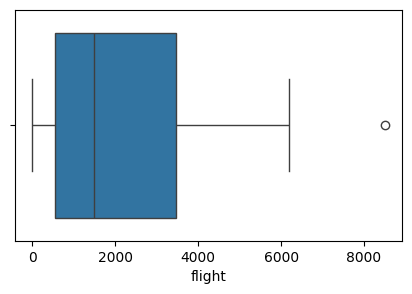

In [101]:
plt.figure(figsize=(5,3))
sns.boxplot(x="flight",data=flight_new)
plt.show()

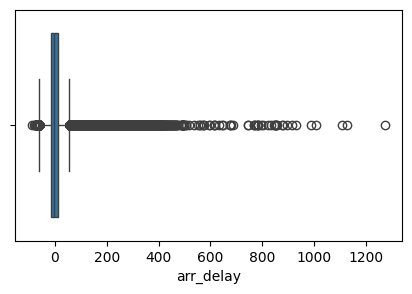

In [109]:
plt.figure(figsize=(5,3))
sns.boxplot(x="arr_delay",data=flight_new)
plt.show()

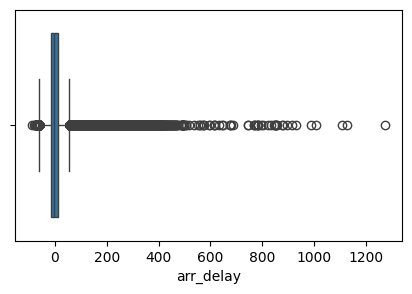

In [113]:
plt.figure(figsize=(5,3))
sns.boxplot(x="arr_delay",data=flight_new)
plt.show()

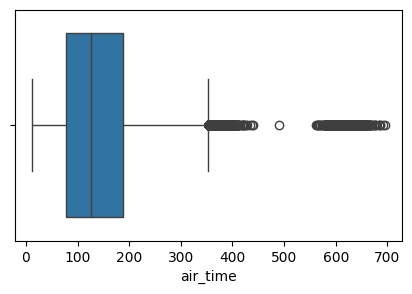

In [115]:
plt.figure(figsize=(5,3))
sns.boxplot(x="air_time",data=flight_new)
plt.show()

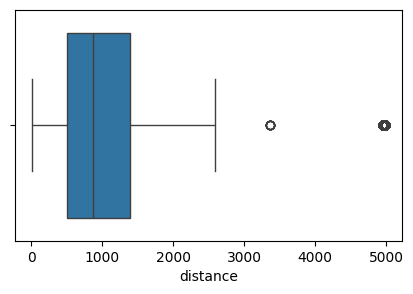

In [119]:
plt.figure(figsize=(5,3))
sns.boxplot(x="distance",data=flight_new)
plt.show()

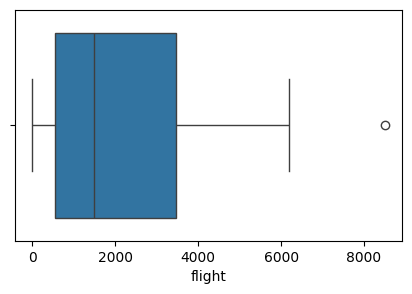

In [121]:
plt.figure(figsize=(5,3))
sns.boxplot(x="flight",data=flight_new)
plt.show()

# Titanic big data all EDA 